#ANALISIS EXPLORATORIO

In [1]:
pip install opendatasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import opendatasets as od

In [3]:
od.download(
	"https://www.kaggle.com/datasets/andrewmvd/spotify-playlists")

Skipping, found downloaded files in "./spotify-playlists" (use force=True to force download)


In [4]:
users = {}
artists = {}
playlists = {}
for chunk in pd.read_csv("spotify-playlists//spotify_dataset.csv", chunksize=10000,on_bad_lines='skip'):
    chunk.columns = ['user', 'artist', 'song', 'playlist']
    chunk.dropna(inplace=True)
    chunk.drop_duplicates(inplace=True)
    chunk.drop(chunk[chunk['playlist']=='Starred'].index,inplace=True)
    chunk.drop(chunk[chunk['playlist']=='Liked from Radio'].index,inplace=True)
    chunk.drop(chunk[chunk['playlist']=='Favoritas de la radio'].index,inplace=True)
    for user in chunk['user']:
        if user in users:
            users[user] += 1
        else:
            users[user] = 1
    for artist in chunk['artist']:
        if artist in artists:
            artists[artist] += 1
        else:
            artists[artist] = 1
    for playlist in chunk['playlist']:
        if playlist in playlists:
            playlists[playlist] += 1
        else:
            playlists[playlist] = 1

In [5]:
df = pd.DataFrame.from_dict(users,orient='index')
df.columns = ['Reproducciones']
df.reset_index(inplace=True)
df.rename(columns={"index": "Usuario"},inplace=True)
df.sort_values('Reproducciones',inplace=True,ascending=False)
print('El top 10 usuarios con más reproducciones son:' )
df.head(10)

El top 10 usuarios con más reproducciones son:


,Usuario,Reproducciones
7651,4398de6902abde3351347b048fcdc287,247927
3462,7ee2b92c5bcf6133b8132363e5bda960,90628
1766,99deafd9b792af8e6a535483088faef2,65909
5646,fa849dabeb14a2800ad5130907fc5018,60614
8850,6b85a8076b4f3b1036ef15f09e2feeeb,39638
11547,ed140fce438f59e6e07e5ee7bd726692,33258
14521,2fa1f93e57cfe2f6c4456e98da54061c,31581
12226,c0efe4e704a37894150489b25eac9042,25951
7821,c2d2fed26e858f82fdd8ac2e791cab1f,24830
14772,d49c0fdadc701f66d10aec118604f4b7,24630


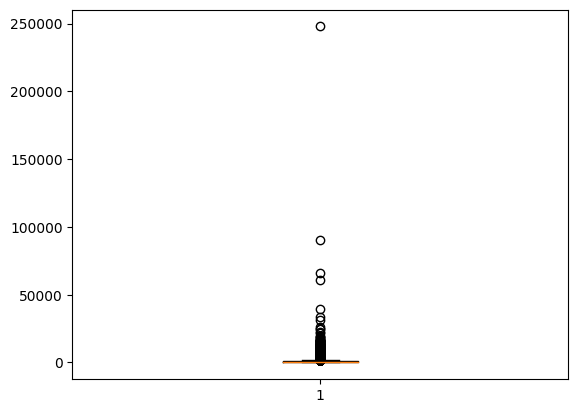

In [6]:
plt.boxplot(df['Reproducciones'])
plt.show()

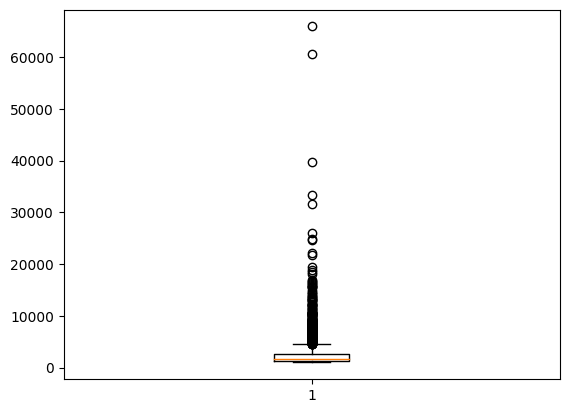

In [7]:
filtro = (df['Reproducciones'] < 1000) | (df['Reproducciones'] > 70000)
df.drop(df[filtro].index,inplace=True)
df.reset_index(inplace=True)
plt.boxplot(df['Reproducciones'])
plt.show()

Text(0.5, 0, 'Usuario')

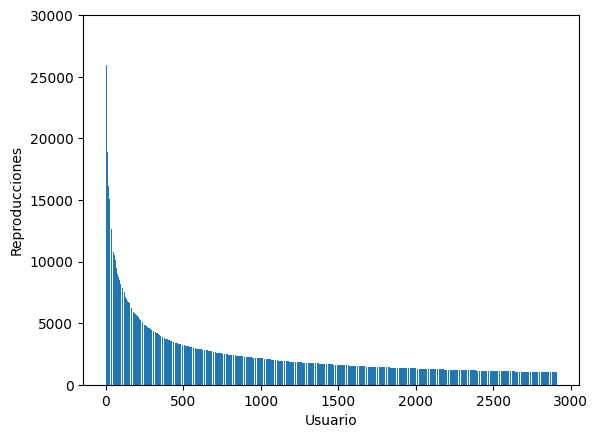

In [8]:
plt.bar(df.index,df['Reproducciones'])
plt.ylim(0,30000)
plt.ylabel('Reproducciones')
plt.xlabel('Usuario')


In [9]:
df = pd.DataFrame.from_dict(artists,orient='index')
df.columns = ['Reproducciones']
df.reset_index(inplace=True)
df.rename(columns={"index": "Artist"},inplace=True)
df.sort_values('Reproducciones',inplace=True,ascending=False)
print('El top 10 artistas con más reproducciones son:' )
df.head(10)

El top 10 artistas con más reproducciones son:


,Artist,Reproducciones
103,Daft Punk,30926
393,Coldplay,30030
198,The Rolling Stones,26966
248,Radiohead,25306
912,Eminem,24991
1074,Kanye West,24690
1356,David Bowie,24253
969,JAY Z,24220
228,Queen,24181
144,Michael Jackson,23746


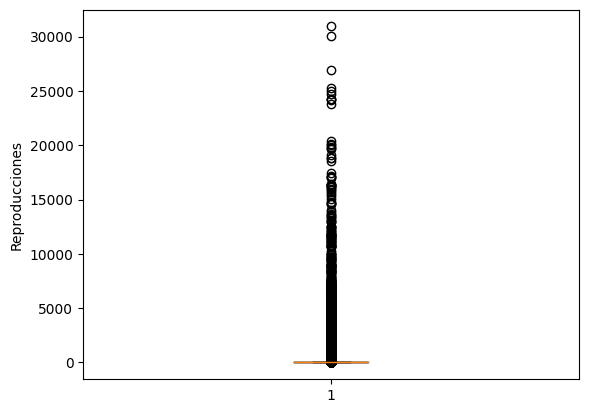

In [10]:
plt.boxplot(df['Reproducciones'])
plt.ylabel('Reproducciones')
plt.show()

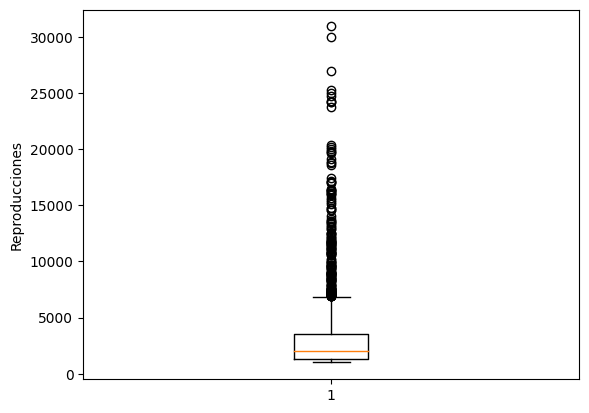

In [11]:
filtro = (df['Reproducciones'] < 1000) | (df['Reproducciones'] > 100000)
df.drop(df[filtro].index,inplace=True)
df.reset_index(inplace=True)
plt.boxplot(df['Reproducciones'])
plt.ylabel('Reproducciones')
plt.show()

Text(0.5, 0, 'Artista')

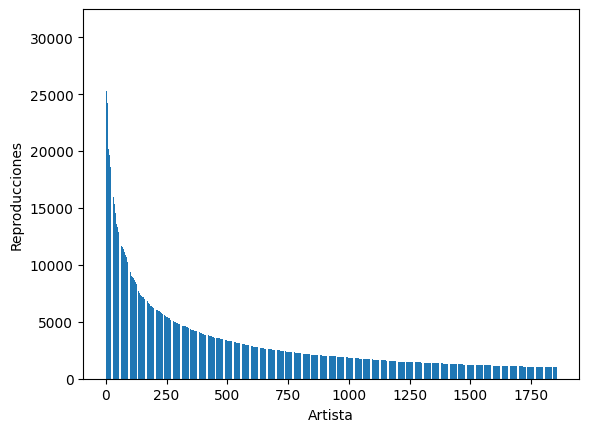

In [12]:
plt.bar(df.index,df['Reproducciones'])
plt.ylabel('Reproducciones')
plt.xlabel('Artista')

In [13]:
df = pd.DataFrame.from_dict(playlists,orient='index')
df.columns = ['Reproducciones']
df.reset_index(inplace=True)
df.rename(columns={"index": "Playlist"},inplace=True)
df.sort_values('Reproducciones',inplace=True,ascending=False)
print('El top 10 playlist con más reproducciones son:' )
df.head(10)

El top 10 playlist con más reproducciones son:


,Playlist,Reproducciones
2811,Rock,30107
859,2014,22674
1382,Christmas,22236
1404,2013,20870
1997,Work,18408
207,Jazz,18266
1464,Indie,17858
465,Classical,16328
63474,everything,15705
2677,Country,15503


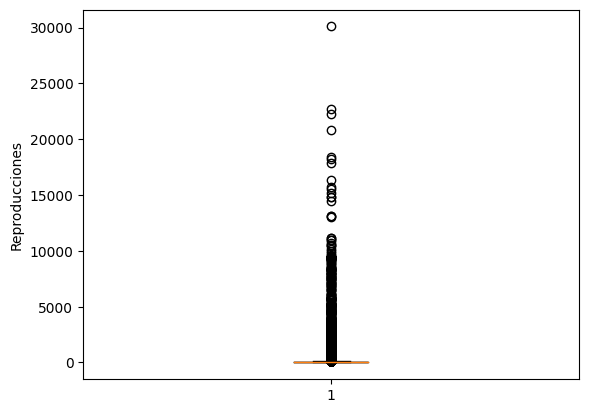

In [14]:
plt.boxplot(df['Reproducciones'])
plt.ylabel('Reproducciones')
plt.show()

In [15]:
df.drop(df[df['Reproducciones']<1000].index,inplace=True)
df.reset_index(inplace=True)


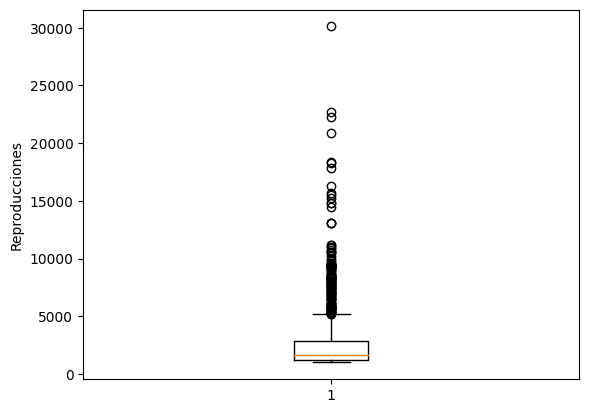

In [16]:
plt.boxplot(df['Reproducciones'])
plt.ylabel('Reproducciones')
plt.show()

Text(0.5, 0, 'Playlist')

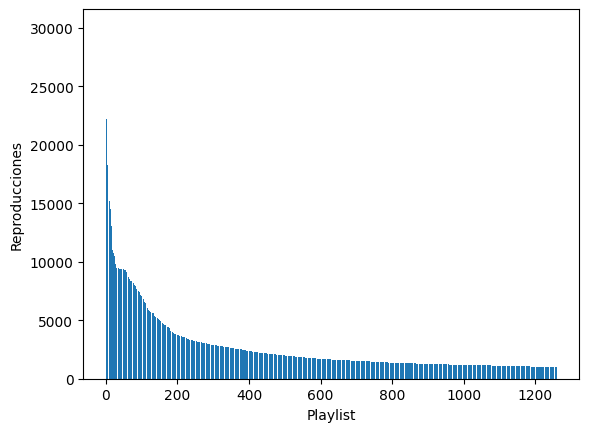

In [17]:
plt.bar(df.index,df['Reproducciones'])
plt.ylabel('Reproducciones')
plt.xlabel('Playlist')